# Numerical Simulation Laboratory

# Numerical exercise 10

## Exercise 10.1
Sviluppare un algoritmo di **simulated annealing** per la trovare la soluzione ottimale del *Travelling Salesman Problem*, utilizzando le mappe dell'esercizio 9.

Come nell'esercizio precedente, genero le posizioni di $N$ città e su una cinrconferenza e dentro un quadrato e rappresento i possibili percorsi con un vettori di interi positivi da $1$ a $N-1$, avendo associato ogni città a un indice da 0 a $N-1$. Come nel caso precedente, i possibili percorsi devono partire sempre dalla stessa città e devono passare una ed una sola volta da ciascuna città.

Applicando il simulated annealing, campiono lo spazio dei possibili percorsi sfruttando **l'algoritmo di Metropolis** con una probabilità dipendente da una temperatura fittizia $T$ che cala gradualmente durante l'esecuzione del programma. Ad ogni step dell'algoritmo, applicando gli *operatori di mutazione* sul cammino attuale, genero un nuovo percorso che **accetto o rifiuto con una probabilità** pari a:
    $$ \alpha = min \left(1, \exp^{-\beta \left( L(\vec{x}')-L(\vec{x}) \right)} \right) \,,$$

dove $L(\vec{x})$ è la lunghezza del percorso attuale, $L(\vec{x}')$ è la lunghezza del percorso proposto e $\beta=\frac{1}{t}$ è l'inverso della temperatura fittizia. In questo modo campiono lo spazio dei possibili percorsi generando $nstep$ cammini ad ogni temperatura fissata e ottenendo progressivamente il percorso corrispondente al minimo della lunghezza.

### <font color='red'> Operatori di mutazione</font>
Utilizzaimo gli stessi operatori di mutazione dell'algoritmo genetico, alterando le probabilità di ognuna:

- *Pair permutation* ($P = 0.25$), che consiste nello scambio di due città scelte casualmente, ad eccezione della città zero che non deve essere modificata.

- *Block permutation* ($P = 0.25$), che consiste nello scambio di due sottopercorsi della stessa lunghezza (lunghi minimo $1$ e al più la metà di $N-1$) distinti scelti casualmente.

- *Shift sub-path* ($P = 0.25$), che consiste nello slittamento di un sottopercorso (lungo minimo $1$ e al più $N-2$, escludendo così la città zero e l'altro sottopercorso che sarà al minimo unitario) lungo il percorso totale, sempre ad eccezione della città zero.

- *Reverse sub-path* ($P = 0.25$), che consiste nell'inversione dell'ordine di un sottopercorso proprio.


Ad ogni step viene scelta una e una sola di queste mutazioni e applicata al percorso corrente.

### <font color='blue'> Città lungo una Circonferenza</font>
Applico l'algoritmo di ricerca basato sul *simulated annealing* al caso di $32$ città disposte lungo una circonferenza di raggio $r=1$.
Per ogni temperatura fissata genero $N_{step}=10^4$ percorsi differenti e utilizzo $500$ valori di temperatura compresi nell'intervallo $[0.01, 5]$, determino complessivamente $5 \times 10^6$ cammini differenti, uno per ogni step dell'algoritmo di Metropolis.

Il grafico seguente mostra il confronto tra la lunghezza del miglior percorso ottenuto tramite simulated annealing e la lunghezza del percorso migliore di ogni generazione ottenuto tramite l'algoritmo genetico sullo stesso insieme di città. Si vede che il simulated annealing riesce a risolvere un incrocio tra due città vicine e avvicinarsi maggiormente al minimo globale, forse anche per l'ordine di grandezza in più di percorsi generati per esplorare lo spazio ($5 \times 10^6$ contro $5 \times 10^5$ dell'algotimo genetico utilizzato precedentemente), ma i due risultati sono comunque vicini ed entrambi buoni minimi anche nel caso siano locali.

Lunghezza finale tramite SA:  6.20103
Lunghezza finale tramite GA:  6.22025


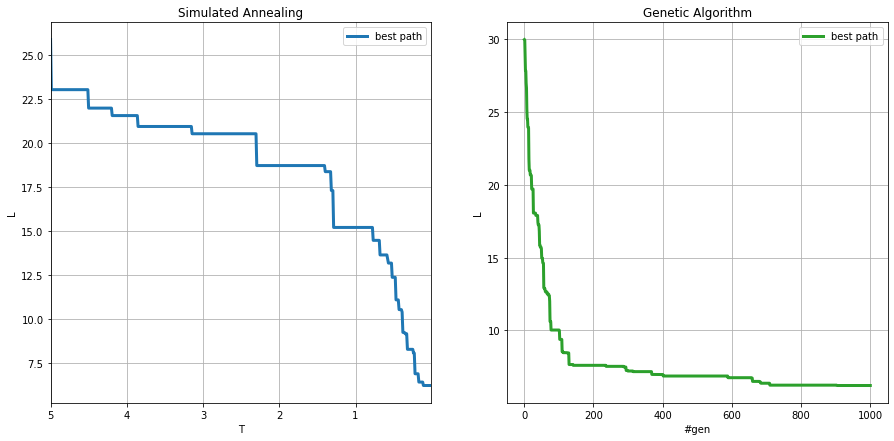

In [2]:
import numpy as np
import matplotlib.pyplot as plt

t, L = np.loadtxt('data/SA/SA_pathlength_circ.dat', unpack=True)
plt.figure(figsize=(15, 7))

plt.subplot(121) #Simulated Annealing
plt.plot(t, L, label='best path', lw=3)
plt.title('Simulated Annealing')
plt.xlim(t[0], t[-1])
plt.xlabel('T')
plt.ylabel('L')
plt.legend()
plt.grid(True)

print('Lunghezza finale tramite SA: ', L[-1])
t, dum, L = np.loadtxt('../lsnex9/data/circ/path_length.dat', unpack=True)

plt.subplot(122) #Genetic Algorithm
t = np.arange(1, len(L)+1)
print('Lunghezza finale tramite GA: ', L[-1])

plt.plot(t, L, label='best path', lw=3, c='tab:green')
plt.title("Genetic Algorithm")
plt.xlabel('#gen')
plt.ylabel('L')
plt.legend()
plt.grid(True)

Il grafico seguente mostra il percorso migliore ottenuto tramite simulated annealing confrontato col miglior percorso ottenuto tramite l'algoritmo genetico della scorsa esercitazione. Si può osservare che in entrambi i casi le città vengono percorse quasi tutte seguendo l'ordine della circonferenza.

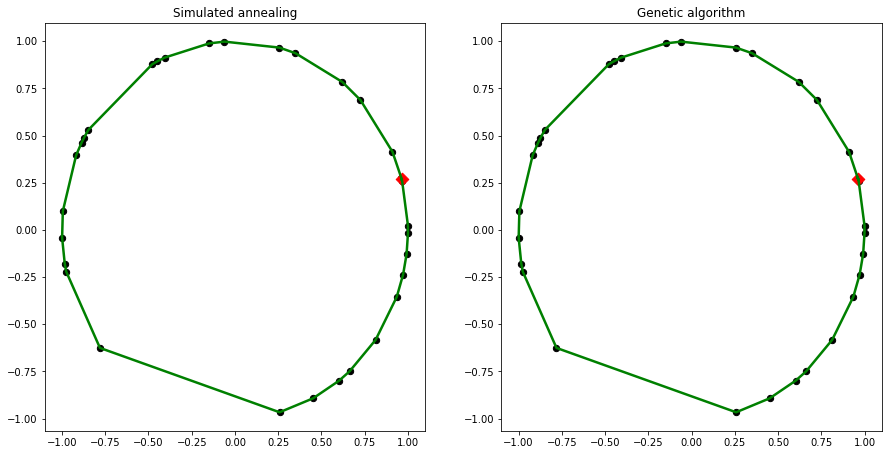

In [7]:
import numpy as np
import matplotlib.pyplot as plt

filename=['data/SA/SA_optpath_circ.dat', '../lsnex9/data/circ/opt_path.dat']
plottitle=['Simulated annealing', 'Genetic algorithm']
subp=[121,122]
plt.figure(figsize=(15, 7.5))

for pl in range(len(subp)):
    data=open(filename[pl])
    strcities=data.readline()
    strpath=data.readline()
    citiesxy=np.fromstring(strcities, sep=' ')
    bestpath=np.fromstring(strpath, dtype=np.int32, sep=' ')

    xpath = [citiesxy[0]]
    ypath = [citiesxy[1]]

    for i in bestpath:
        xpath.append(citiesxy[2*i])
        ypath.append(citiesxy[2*i+1])

    xpath.append(citiesxy[0])
    ypath.append(citiesxy[1])

    plt.subplot(subp[pl])
    plt.title(plottitle[pl])
    plt.scatter(citiesxy[2::2], citiesxy[3::2], s=40, c='black') #città
    plt.scatter(citiesxy[0], citiesxy[1], s=80, marker='D', c='red')
    plt.plot(xpath, ypath, lw=2.5, color='green') #percorso

plt.show()

### <font color='blue'> Città in un Quadrato inserisci accrate da 90 a 2percento</font>
Applico l'algoritmo di ricerca basato sul *simulated annealing* al caso di $32$ città disposte all'interno di un quadrato di lato $l=10$.
Per ogni temperatura fissata genero $N_{step}=10^4$ percorsi differenti e, modificando la temperatura per $500$ volte nell'intervallo $[0.01, 5]$, determino complessivamente $5 \times 10^6$ cammini differenti, uno per ogni step dell'algoritmo di Metropolis. Esplorare questo range di temperature fittizie produce acceptance rate che vanno dal $90\%$ per le temperature alte, a circa il $5\%$ per le temprature basse 

Il grafico seguente mostra il confronto tra la lunghezza del miglior percorso ottenuto tramite simulated annealing e la lunghezza del percorso migliore di ogni generazione ottenuto tramite l'algoritmo genetico sullo stesso insieme di città. Si vede che il simulated annealing riesce a risolvere un incrocio tra due città vicine e avvicinarsi maggiormente al minimo globale, forse anche per l'ordine di grandezza in più di percorsi generati per esplorare lo spazio: $5 \times 10^6$ contro $5 \times 10^5$ dell'algotimo genetico utilizzato precedentemente, anche se è ancora più evidente in questo caso che il simulated annealing inizi ad esplorare i percorsi con lunghezze vicine alla ottimale ($L<7$ o $L<6$) proprio alle temperature finali, probabilemnte potrebbe essere una buona idea ricalibrare il range di temperature per essere più efficaci nella ricerca. I due risultati sono comunque vicini ed entrambi buoni minimi anche nel caso siano locali.

Lunghezza finale tramite SA:  5.34107
Lunghezza finale tramite GA:  5.64826


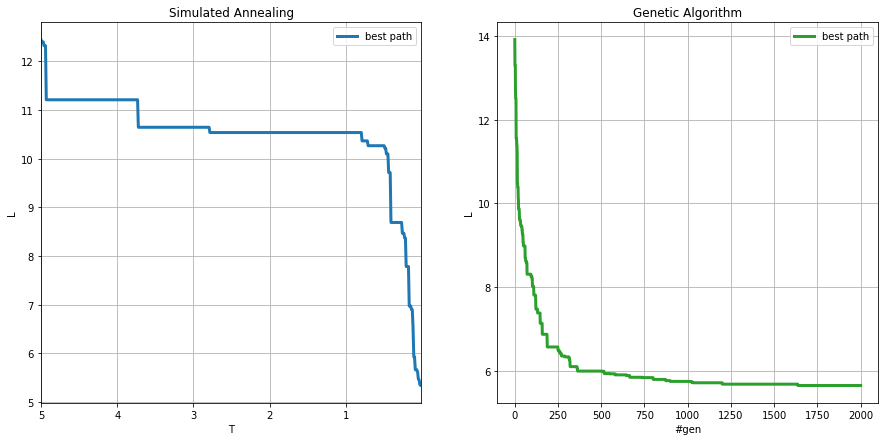

In [4]:
import numpy as np
import matplotlib.pyplot as plt

t, L = np.loadtxt('data/SA/SA_pathlength_square.dat', unpack=True)
plt.figure(figsize=(15, 7))

plt.subplot(121) #Simulated Annealing
plt.plot(t, L, label='best path', lw=3)
plt.title('Simulated Annealing')
plt.xlim(t[0], t[-1])
plt.xlabel('T')
plt.ylabel('L')
plt.legend()
plt.grid(True)

print('Lunghezza finale tramite SA: ', L[-1])
t, dum, L = np.loadtxt('../lsnex9/data/square/path_length2k.dat', unpack=True)

plt.subplot(122) #Genetic Algorithm
t = np.arange(1, len(L)+1)
print('Lunghezza finale tramite GA: ', L[-1])

plt.plot(t, L, label='best path', lw=3, c='tab:green')
plt.title("Genetic Algorithm")
plt.xlabel('#gen')
plt.ylabel('L')
plt.legend()
plt.grid(True)

Il grafico seguente mostra il percorso migliore ottenuto tramite simulated annealing confrontato col miglior percorso ottenuto tramite l'algoritmo genetico della scorsa esercitazione. Si possono notare alcune differenze tra i due percorsi, il simulated annealing è riuscito ad ottenere un risultato migliore riducendo del $5\%$ la lunghezza totale del percorso.

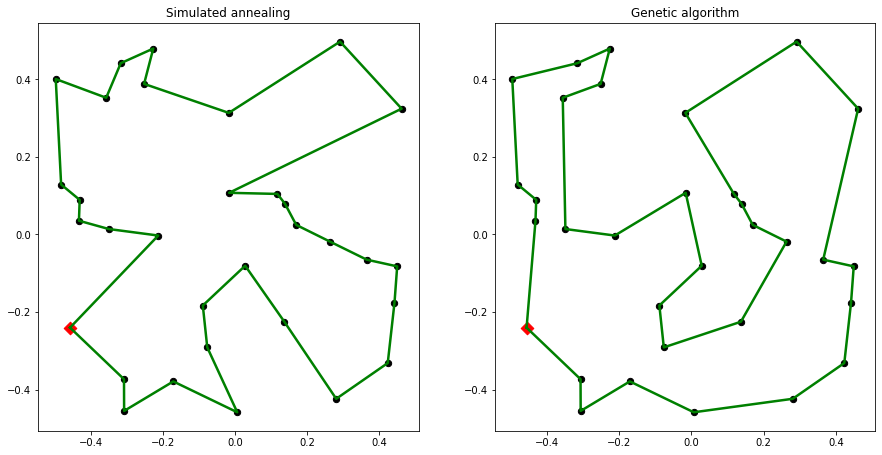

In [1]:
import numpy as np
import matplotlib.pyplot as plt

filename=['data/SA_optpath.dat', '../lsnex9/data/square/opt_path2k.dat']
plottitle=['Simulated annealing', 'Genetic algorithm']
subp=[121,122]
plt.figure(figsize=(15, 7.5))

for pl in range(len(subp)):
    data=open(filename[pl])
    strcities=data.readline()
    strpath=data.readline()
    citiesxy=np.fromstring(strcities, sep=' ')
    bestpath=np.fromstring(strpath, dtype=np.int32, sep=' ')

    xpath = [citiesxy[0]]
    ypath = [citiesxy[1]]

    for i in bestpath:
        xpath.append(citiesxy[2*i])
        ypath.append(citiesxy[2*i+1])

    xpath.append(citiesxy[0])
    ypath.append(citiesxy[1])

    plt.subplot(subp[pl])
    plt.title(plottitle[pl])
    plt.scatter(citiesxy[2::2], citiesxy[3::2], s=40, c='black') #città
    plt.scatter(citiesxy[0], citiesxy[1], s=80, marker='D', c='red')
    plt.plot(xpath, ypath, lw=2.5, color='green') #percorso

plt.show()

## Exercise 10.2
Modificare il codice di *genetic algorithm* in modo che possa sfruttare il **parallel computing**  per eseguire l'algoritmo in parallelo su diversi nodi, sfruttando lo schema "Single Data Multiple Program"; ossevare poi come cambiano i risultati rispetto all'esecuzione seriale. 

Il programma implementato esegue il medesimo algoritmo di ricerca genetica su nodi diversi che giungono indipendentemente a soluzioni distinte. Ogni $N_{merge}$ generazioni però, i nodi comunicano: una volta fatta la selezione nelgi algoritmi genetici, ogni nodo elimina il proprio peggior percorso e si prepara a ricevere, in maniera casuale, il miglior percorso di un altro nodo. Tramite tale procedimento l'algoritmo mi aspetto converga  più rapidamente al risultato finale.

<img src='img/spmd.png' width=400>
<center> <font size=0.8> Paradigma di calcolo parallelo "single program multiple data" </font> </center>

Nei grafici seguenti sono mostrati i risultati dei singoli nodi ottenuti lanciando l'algoritmo genetico parallelizzato su **2, 3 e 4 nodi differenti** con una popolazione di $500$ individui, per $2000$ iterazioni  ed effettuando la migrazione casuale dei migliori percorsi ogni $10$ generazioni. Per confronto è riportata anche la lunghezza del percorso migliore ottenuta dall'algoritmo genetico non parallelizzato sul medesimo insieme di città. 
Si può osservare dai grafici che il programma parallelizzato ben più velocemente al minimo finale, con tre nodi già verso le 400 generazioni l'algoritmo sembra aver raggiunto la soluzione ottimale. Inoltre in tutti i tre casi, la lunghezza finale ottenuta fornisce un buon miglioramento rispetto al caso dell'algoritmo seriale, come del resto dovrei attendermi. 

Il caso con 4 nodi sembra essere un po' anomalo, perché sebbene faccia meglio del caso seriale, non riesce a fare meglio dei casi a 2 e 3 nodi; ciò potrebbe essere causato dalla specifica zona dello spazio dei percorsi esplorata dall'algoritmo: quest'ultimo potrebbe essersi appoggiato a un minimo locale e potrebbe non esser più riuscito a uscire dalla "valle" del minimo, trovando così una soluzione più distante dal minimo globale.

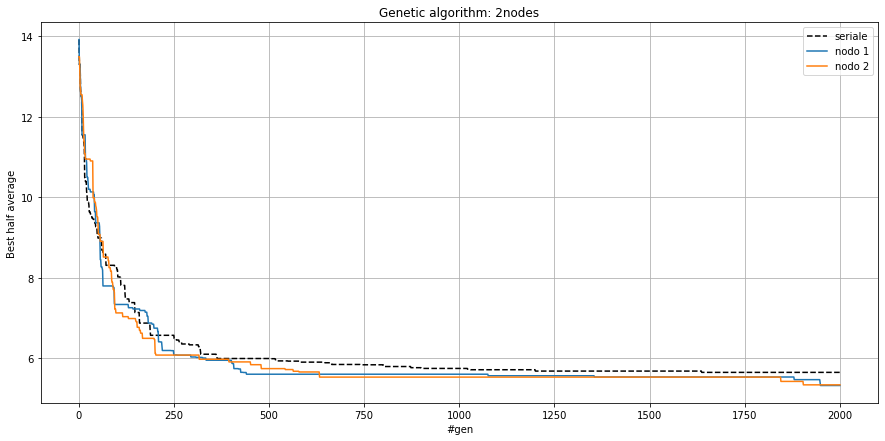

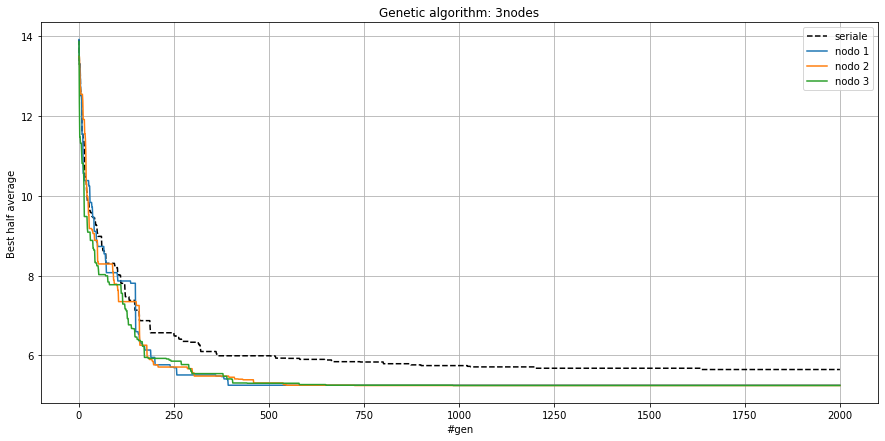

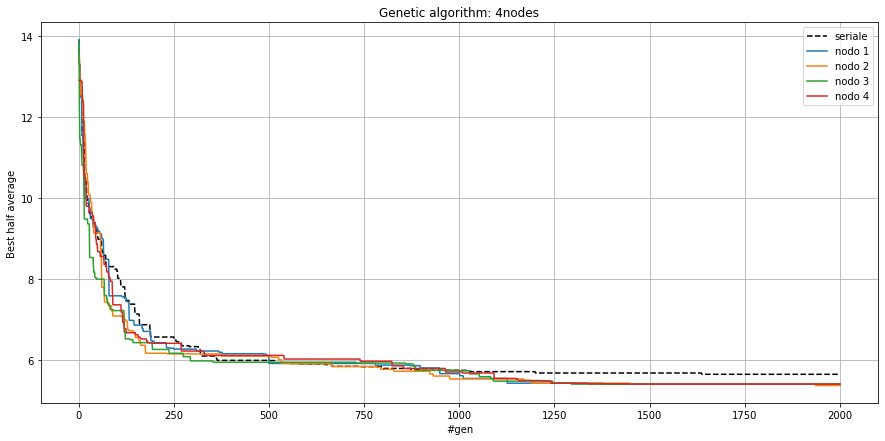

lunghezze migliori percorsi:
seriale: 5.64826
2 nodes: 5.32198
3 nodes: 5.24755
4 nodes: 5.37132


In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt

direct=[2,3,4]
m_all=[]
m=[]
ser_av, avL2, ser_min=np.loadtxt('../lsnex9/data/square/path_length2k.dat', unpack=True)
gen = np.arange(len(ser_min))+1

for d in direct:
    for i in range(d):
        avL, avL2, minL = np.loadtxt('data/'+str(d)+'nodes/path_length'+str(i)+'.dat', unpack=True)
        m_all.append(minL)
        m.append(minL[-1])
        
    plt.figure(figsize=(15,7))
    plt.plot(gen, ser_min, ls='dashed', color='black', label='seriale')
    for i in range(len(m_all)):
        plt.plot(gen,m_all[i], label='nodo '+str(i+1))
    plt.title('Genetic algorithm: ' + str(d) + 'nodes')
    plt.xlabel('#gen')
    plt.ylabel('Best half average')
    plt.grid(True)
    plt.legend()
    plt.show()
    m_all.clear()


print('lunghezze migliori percorsi:')
print('seriale:', ser_min[-1])
print('2 nodes:', min(m[0:2]))
print('3 nodes:', min(m[2:5]))
print('4 nodes:', min(m[5:9]))

I grafici sottostanti mostrano i percorsi ottenuti dall'algoritmo di ricerca genetica parallelizzato su 2,3 e 4 nodi diversi.

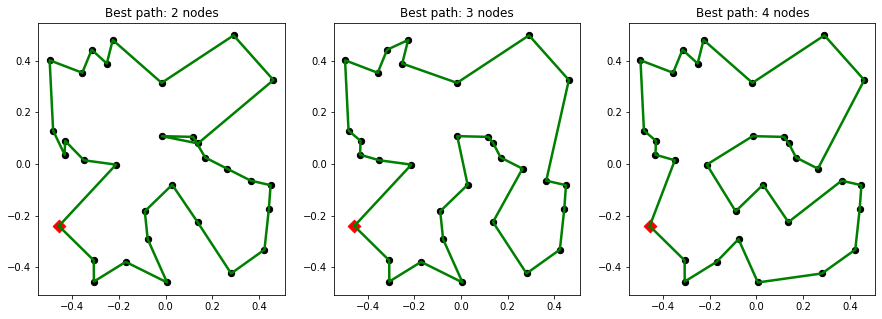

In [9]:
import numpy as np
import matplotlib.pyplot as plt

filename=['data/2nodes/opt_path1.dat', 'data/3nodes/opt_path1.dat', 'data/4nodes/opt_path1.dat']
plottitle=['Best path: 2 nodes', 'Best path: 3 nodes', 'Best path: 4 nodes']
subp=[131,132,133]
plt.figure(figsize=(15, 5))

for pl in range(len(subp)):
    data=open(filename[pl])
    strcities=data.readline()
    strpath=data.readline()
    citiesxy=np.fromstring(strcities, sep=' ')
    bestpath=np.fromstring(strpath, dtype=np.int32, sep=' ')

    xpath = [citiesxy[0]]
    ypath = [citiesxy[1]]

    for i in bestpath:
        xpath.append(citiesxy[2*i])
        ypath.append(citiesxy[2*i+1])

    xpath.append(citiesxy[0])
    ypath.append(citiesxy[1])

    plt.subplot(subp[pl])
    plt.title(plottitle[pl])
    plt.scatter(citiesxy[2::2], citiesxy[3::2], s=40, c='black') #città
    plt.scatter(citiesxy[0], citiesxy[1], s=80, marker='D', c='red')
    plt.plot(xpath, ypath, lw=2.5, color='green') #percorso

plt.show()